# Assignment for Adapt Ready 

# 2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 
Example 1:

Input: [1,3,5,4,7]
Output: 3 

Example 2:

Input: [2,2,2,2,2]
Output: 1

In [1]:
#function LCIS consider a list of integers (numb) as input and returns the length of the lcis.
# LCIS - LONGEST CONTINOUS INCREASING SUBSEQUENCE
def LCIS(numb):
    n = len(numb)
    if n == 0:
        return 0
    abc = [1] * n # Initialize an array to store the length of the LCIS ending at each index
    for i in range(1, n):  # Find the LCIS length for each element by considering previous elements
        if numb[i] > numb[i - 1]:   # Check if the current element is greater than the previous element
            abc[i] = abc[i - 1] + 1    # If it is, the LCIS length at the current index is 1 + LCIS length at the previous index
    return max(abc)    # Return the maximum value in the dp array, which represents the length of the LCIS

# test case 1
numb1 = [1,3,5,4,7]
length1 = LCIS(numb1)
print("Length of longest continuous increasing subsequence:", length1)

# test case 2
numb2 = [2,2,2,2,2]
length2 = LCIS(numb2)
print("Length of longest continuous increasing subsequence:", length2)

Length of longest continuous increasing subsequence: 3
Length of longest continuous increasing subsequence: 1


# 3. Given a list of non negative integers, arrange them such that they form the largest number.
 
Example 1:

Input: [10,2]
Output: "210"
 
Example 2:

Input: [3,30,34,5,9]
Output: "9534330"

In [2]:
from itertools import permutations
test_list = [10, 20, 30, 40] # initializing list 
print ("The original list is : " + str(test_list))
# using itertools.permutation() + join() + max()
# largest possible number in list 
res = int(max((''.join(i) for i in permutations(str(i) 
                                                for i in test_list)), key = int))
# printing result 
print ("The largest possible number : ", str(res))


The original list is : [10, 20, 30, 40]
The largest possible number :  40302010


# 4. Store all the &quot;servlet-name&quot;, and &quot;servlet-class&quot; to a csv file from the attached sample_json.json file using Python.

In [3]:
#importing libraries
import json
import csv

# Define the output CSV file name
output_file = "servlet_mappings.csv"

try:
    with open(r"C:\Users\LOKESH B S\Downloads\DT A1 sample_json (1) (1).json") as json_file: #path of the json file 
        data = json.load(json_file)
except FileNotFoundError:
    print(f"Error: JSON file 'sample_json.json' not found.")
    exit(1) 

# Extract servlet mappings
servlet_mappings = []
if "web-app" in data and "servlet" in data["web-app"]:  # Adjust keys based on structure
    for servlet in data["web-app"]["servlet"]:
        # Check for string values in keys before accessing
        if isinstance(servlet.get("servlet-name"), str) and isinstance(servlet.get("servlet-class"), str):
            servlet_name = servlet["servlet-name"]
            servlet_class = servlet["servlet-class"]
            servlet_mappings.append((servlet_name, servlet_class))
        else:
            print(f"Warning: Skipping entry with non-string values in 'servlet-name' or 'servlet-class'.")

# Write to CSV file
with open(output_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["servlet-name", "servlet-class"])  # Header row
    writer.writerows(servlet_mappings)

print(f"Servlet mappings written to CSV file: {output_file}")

# 1. Problem statement:

Download the data from the file data source and provide possible data insights.


Data set reference link: https://www.consumerfinance.gov/dataresearch/consumer-complaints/#download-the-data


File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip

In [4]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [5]:
#importing data set
import pandas as pd
data=pd.read_csv(r"C:\Users\LOKESH B S\Downloads\complaints.csv\complaints.csv")
data.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,NaN,Consent not provided,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268


In [6]:
data.shape # the data set contain 51,67,782 records(rows) and 18 attributes (columns)

(5167782, 18)

In [7]:
data.columns # the different attributes recorded

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [8]:
data.isnull().sum() # we can observe that the considrable amout of data are missing.

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        735101
Consumer complaint narrative    3351574
Company public response         2693192
Company                               0
State                             45611
ZIP code                          30225
Tags                            4684932
Consumer consent provided?      1026812
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4399466
Complaint ID                          0
dtype: int64

In [9]:
data.info() # checking the information of data types of each attribute ( column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167782 entries, 0 to 5167781
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 709.

In [10]:
a=data['Product'].unique()
b=data['Product'].nunique() # checking for the number of different products = 21 different products
print("there are", b, " products and they are :", a)

there are 21  products and they are : ['Credit reporting or other personal consumer reports' 'Debt collection'
 'Money transfer, virtual currency, or money service' 'Credit card'
 'Checking or savings account' 'Student loan'
 'Payday loan, title loan, personal loan, or advance loan'
 'Vehicle loan or lease' 'Prepaid card' 'Mortgage'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Debt or credit management' 'Credit card or prepaid card'
 'Payday loan, title loan, or personal loan' 'Money transfers'
 'Credit reporting' 'Bank account or service' 'Consumer Loan'
 'Payday loan' 'Other financial service' 'Virtual currency']


In [11]:
a=data['Sub-product'].unique()
b=data['Sub-product'].nunique() # checking for the number of different Sub-products = 86 different sub-products
print("there are", b, "sub-products and they are :", a)

there are 86 sub-products and they are : ['Credit reporting' 'Other debt' 'Domestic (US) money transfer'
 'I do not know' 'Store credit card' 'Checking account'
 'General-purpose credit card or charge card'
 'Federal student loan servicing' 'Auto debt' 'Credit card debt'
 'Payday loan' 'Loan' 'Other banking product or service'
 'Government benefit card' 'Other type of mortgage'
 'Telecommunications debt' 'Payday loan debt' 'Conventional home mortgage'
 'Savings account' 'FHA mortgage' 'Rental debt' 'Private student loan'
 'Other personal consumer report' 'Personal line of credit' 'Medical debt'
 'Federal student loan debt' 'Lease' 'General-purpose prepaid card'
 'Mortgage modification or foreclosure avoidance'
 'Home equity loan or line of credit (HELOC)' 'Debt settlement'
 'Installment loan' 'Gift card' 'Mobile or digital wallet'
 'Private student loan debt' 'VA mortgage' 'Title loan' 'Virtual currency'
 'Reverse mortgage' 'Credit repair services' 'Check cashing service'
 'Internation

In [12]:
data['Issue'].nunique()
# Checking for different types of main issese observed = 178 uniques issues observed

178

In [13]:
data['Sub-issue'].nunique()
# Checking for different types of Sub-issese observed = 272 uniques sub - issues observed

272

In [14]:
data['Company'].nunique()
# Checking for number of companies observed =  7,204 companies observed

7204

In [15]:
data['State'].nunique()
# Checking for number of states observed =  63 states observed

63

In [16]:
data['ZIP code'].nunique()
# Checking for number of ZIP codes observed =  Cummulative of 33,632 ZIP codes observed with respect to 63 states

33632

In [17]:
x= data["Tags"].nunique() 
y= data["Tags"].unique()
print("number of tags are observed", x, "and they are", y)
# checking on number of tags observed and listing them

number of tags are observed 3 and they are [nan 'Servicemember' 'Older American' 'Older American, Servicemember']


In [18]:
p= data["Submitted via"].nunique() 
q= data["Submitted via"].unique()
print("The compalaints are submitted via",p, "different means, and they are", q)
# checking on the means of submission of complaints

The compalaints are submitted via 7 different means, and they are ['Web' 'Phone' 'Referral' 'Postal mail' 'Web Referral' 'Fax' 'Email']


In [19]:
ab= data["Company response to consumer"].nunique() 
bc= data["Company response to consumer"].unique()
print("The observed company response to customers are of ",ab, "different types, and they are", bc)
# checking on the different types of response to customer from company

The observed company response to customers are of  8 different types, and they are ['Closed with explanation' 'Closed with non-monetary relief'
 'Closed with monetary relief' 'In progress' 'Untimely response' nan
 'Closed without relief' 'Closed' 'Closed with relief']


In [20]:
print(data["Timely response?"].unique()) # checking for types of response recived from company

['Yes' 'No']


In [21]:
print (data["Consumer disputed?"].unique())
# Cheching for response recorded for weather the cunsumer dispute was sorted or not

[nan 'Yes' 'No']


In [22]:
def object_to_datetime_features(data,column):

    data[column] = data[column].astype('datetime64[ns]')
    data['Year'] = data[column].dt.year
    data['Month'] = data[column].dt.month
    data['Day'] = data[column].dt.day
    data['DoW'] = data[column].dt.dayofweek
    data['DoW'] = data['DoW'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',
                                   3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
    return data

data1 = object_to_datetime_features(data,'Date received')
data1.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Year',
       'Month', 'Day', 'DoW'],
      dtype='object')

In [23]:
data1.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year,Month,Day,DoW
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,...,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544,2024,1,24,Wednesday
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,...,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268,2024,2,26,Monday


In [24]:
data1['Year'].unique()
# Checking for the number of years data we have and we have total of 14 years data

array([2024, 2023, 2022, 2012, 2014, 2013, 2017, 2019, 2015, 2021, 2020,
       2018, 2016, 2011])

In [25]:
ldf = data1['Company public response'].value_counts(ascending=False).to_frame()

ldf.style\
    .bar(align='mid', color=['#3b3745','#F1A424'])

,count
Company public response,
Company has responded to the consumer and the CFPB and chooses not to provide a public response,2225556
Company believes it acted appropriately as authorized by contract or law,144242
Company chooses not to provide a public response,52473
Company believes the complaint is the result of a misunderstanding,13190
Company disputes the facts presented in the complaint,11244
Company believes complaint caused principally by actions of third party outside the control or direction of the company,7854
Company believes complaint is the result of an isolated error,6342
Company believes complaint represents an opportunity for improvement to better serve consumers,4892
Company can't verify or dispute the facts in the complaint,4529


## From the above we can conclude that the the top 5 reponses are 

"Company has responded to the consumer and the CFPB and chooses not to provide a public response"

"Company believes it acted appropriately as authorized by contract or law"

"Company chooses not to provide a public response"

"Company believes the complaint is the result of a misunderstanding"

"Company disputes the facts presented in the complaint"

In [28]:
Product_count=data1["Product"].value_counts(ascending=False).to_frame()
Product_count.style\
    .bar(align='mid', color=['#3b3745','#F1A424'])

,count
Product,
"Credit reporting, credit repair services, or other personal consumer reports",2163878
Credit reporting or other personal consumer reports,959581
Debt collection,567007
Mortgage,397811
Checking or savings account,212459
Credit card or prepaid card,206373
Credit reporting,140429
Credit card,132976
Student loan,88116


## from the above step, the top 5 products are 

"Credit reporting, credit repair services, or other personal consumer reports"

"Credit reporting or other personal consumer reports"

"Debt collection"

"Mortgage"

"Checking or savings account"



In [29]:
Product_count=data1["Issue"].value_counts(ascending=False).to_frame()
Product_count.style\
    .bar(align='mid', color=['#3b3745','#F1A424'])

,count
Issue,
Incorrect information on your report,1504940
Improper use of your report,799797
Problem with a credit reporting company's investigation into an existing problem,589336
Attempts to collect debt not owed,211699
Problem with a company's investigation into an existing problem,204610
Managing an account,129205
"Loan modification,collection,foreclosure",112306
Incorrect information on credit report,102684
Written notification about debt,96690


## the most recorded 10 issues are 

"Incorrect information on your report"

"Improper use of your report"

"Problem with a credit reporting company's investigation into an existing problem"

"Attempts to collect debt not owed"

"Problem with a company's investigation into an existing problem"

"Managing an account"

"Loan modification,collection,foreclosure"

"Incorrect information on credit report"

"Written notification about debt"

"Trouble during payment process"

In [34]:
df = pd.DataFrame(data1)

# Sort by issue_count (descending) and select top 10
top_10_df = df.sort_values(by='Issue', ascending=False).head(10)

# Get companies and issue counts
top_companies = top_10_df['Company'].tolist()
top_issue_counts = top_10_df['Issue'].tolist()

# Print the result
print("Top 10 companies with the maximum number of issues:")
for i in range(len(top_companies)):
    print(f"{i+1}. {top_companies[i]} ({top_issue_counts[i]} issues)")


Top 10 companies with the maximum number of issues:
1. Coinbase, Inc. (Wrong amount charged or received issues)
2. CITIZENS FINANCIAL GROUP, INC. (Wrong amount charged or received issues)
3. PNC Bank N.A. (Wrong amount charged or received issues)
4. JPMORGAN CHASE & CO. (Wrong amount charged or received issues)
5. Coinbase, Inc. (Wrong amount charged or received issues)
6. BANK OF AMERICA, NATIONAL ASSOCIATION (Wrong amount charged or received issues)
7. Remitly, Inc. (Wrong amount charged or received issues)
8. WELLS FARGO & COMPANY (Wrong amount charged or received issues)
9. WELLS FARGO & COMPANY (Wrong amount charged or received issues)
10. Envios de Valores La Nacional Corp. (Wrong amount charged or received issues)


# Top 10 companies with the maximum number of issues are:

1. Coinbase, Inc. (Wrong amount charged or received issues)

2. CITIZENS FINANCIAL GROUP, INC. (Wrong amount charged or received issues)

3. PNC Bank N.A. (Wrong amount charged or received issues)

4. JPMORGAN CHASE & CO. (Wrong amount charged or received issues)

5. Coinbase, Inc. (Wrong amount charged or received issues)

6. BANK OF AMERICA, NATIONAL ASSOCIATION (Wrong amount charged or received issues)

7. Remitly, Inc. (Wrong amount charged or received issues)

8. WELLS FARGO & COMPANY (Wrong amount charged or received issues)

9. WELLS FARGO & COMPANY (Wrong amount charged or received issues)

10. Envios de Valores La Nacional Corp. (Wrong amount charged or received issues)

In [37]:
df = pd.DataFrame(data1)

# Sort by issue_count (descending) and select top 10
top_5_df = df.sort_values(by='Issue', ascending=True).head(5)

# Get companies and issue counts
year = top_5_df['Year'].tolist()
top_issue_counts = top_5_df['Issue'].tolist()

# Print the result
print("years with the maximum number of issues:")
for i in range(len(year)):
    print(f"{i+1}. {year[i]} ({top_issue_counts[i]} issues)")

years with the maximum number of issues:
1. 2012 (APR or interest rate issues)
2. 2016 (APR or interest rate issues)
3. 2012 (APR or interest rate issues)
4. 2015 (APR or interest rate issues)
5. 2016 (APR or interest rate issues)


# 2012, 2016 and 2015 are the years with maximum number of issues.

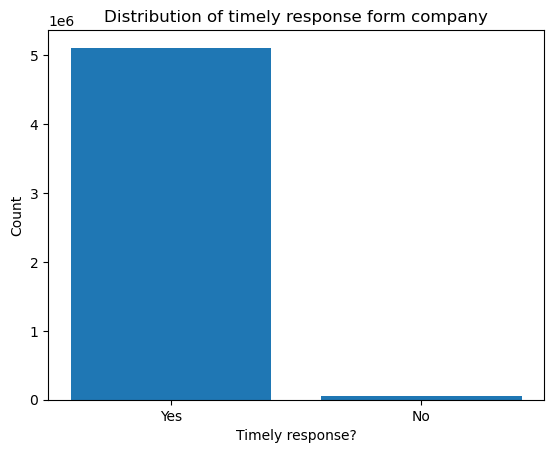

In [40]:
yes_count = df['Timely response?'].value_counts()['Yes']
no_count = df['Timely response?'].value_counts()['No']
plt.bar(['Yes', 'No'], [yes_count, no_count])
plt.xlabel('Timely response?')
plt.ylabel('Count')
plt.title('Distribution of timely response form company')
plt.show()

# The maximum of the time the company has responded and very rarely the has missed to respond back.

In [43]:
dfa = pd.DataFrame(data1)

# Sort by issue_count (descending) and select top 10
top_5_df = dfa.sort_values(by='Issue', ascending=True).head(5)

# Get companies and issue counts
year = top_5_df['State'].tolist()
top_issue_counts = top_5_df['Issue'].tolist()

# Print the result
print("States with the maximum number of issues:")
for i in range(len(year)):
    print(f"{i+1}. {year[i]} ({top_issue_counts[i]} issues)")

States with the maximum number of issues:
1. IA (APR or interest rate issues)
2. TX (APR or interest rate issues)
3. IA (APR or interest rate issues)
4. MI (APR or interest rate issues)
5. CT (APR or interest rate issues)


# The top 5 States with the maximum number of issues:

1. IA (APR or interest rate issues)

2. TX (APR or interest rate issues)

3. IA (APR or interest rate issues)

4. MI (APR or interest rate issues)

5. CT (APR or interest rate issues)

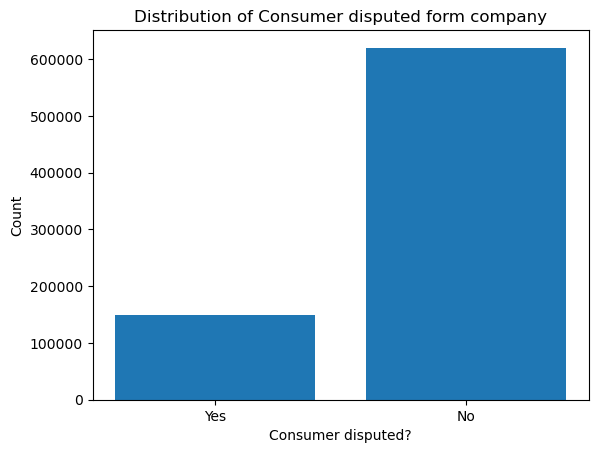

In [52]:
yes_count = df['Consumer disputed?'].value_counts()['Yes']
no_count = df['Consumer disputed?'].value_counts()['No']
plt.bar(['Yes', 'No'], [yes_count, no_count])
plt.xlabel('Consumer disputed?')
plt.ylabel('Count')
plt.title('Distribution of Consumer disputed form company')
plt.show()

# Maximum number of customers are disputed

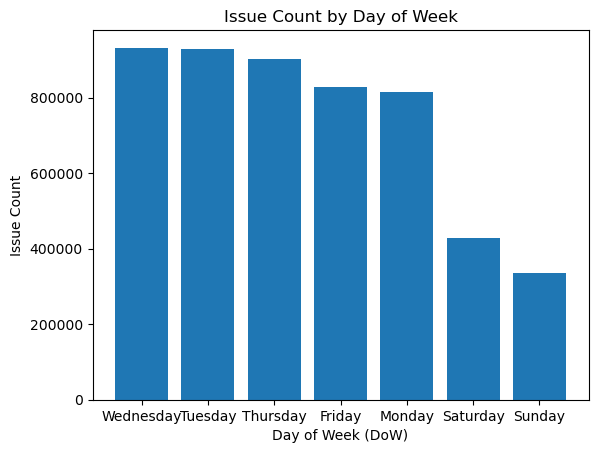

In [54]:
dow_counts = df['DoW'].value_counts()

# Create the bar chart
plt.bar(dow_counts.index, dow_counts.values)  # Use index for DoW labels

# Customize the plot (optional)
plt.xlabel('Day of Week (DoW)')
plt.ylabel('Issue Count')
plt.title('Issue Count by Day of Week')
plt.show()

# Conusmer tend to lodge maximum issues on weekdays. Preferably on Wednesdays and Tuesdays and Consumers tend to write very less complaints on weekends (Saturday,Sunday - might be due to closure of companies on weekends)